# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('Data/Dior1.csv')


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        82 non-null     int64  
 1   text                           78 non-null     object 
 2   post_text                      78 non-null     object 
 3   shared_text                    1 non-null      object 
 4   original_text                  0 non-null      float64
 5   time                           82 non-null     object 
 6   timestamp                      82 non-null     int64  
 7   image                          31 non-null     object 
 8   image_lowquality               81 non-null     object 
 9   images                         80 non-null     object 
 10  images_description             80 non-null     object 
 11  images_lowquality              82 non-null     object 
 12  images_lowquality_description  82 non-null     objec

In [5]:
half_raw_df = raw_df.dropna(subset="post_text")

In [6]:
half_raw_df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,648774307435231,"L’Or de J’adore, a House masterpiece by Franci...","L’Or de J’adore, a House masterpiece by Franci...",NaN,NaN,2023-11-01 17:00:47,1698858047,NaN,https://scontent-sin6-4.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6487743074...,"{'like': 766, 'love': 163, 'wow': 3, 'care': 5}",937,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:30.338214
2,648717870774208,The most wondrous of the season.\n\nFor Holida...,The most wondrous of the season.\n\nFor Holida...,NaN,NaN,2023-11-01 13:00:08,1698843608,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/Dior/posts/6487178707...,"{'like': 3273, 'love': 674, 'haha': 3, 'wow': ...",3977,NaN,118197471568260,NaN,6.487177e+14,['648717684107560'],False,2023-11-02 08:28:37.281304
3,648716550774340,"This Holiday season, Dream in Dior at the hear...","This Holiday season, Dream in Dior at the hear...",NaN,NaN,2023-11-01 09:00:44,1698829244,NaN,https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6487165507...,"{'like': 1178, 'love': 240, 'wow': 4, 'care': 8}",1430,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:41.342308
4,648686550777340,Join Anya Taylor Joy on this dream-like journe...,Join Anya Taylor Joy on this dream-like journe...,NaN,NaN,2023-10-31 18:00:58,1698775258,NaN,https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6486865507...,"{'like': 1273, 'love': 203, 'wow': 4, 'care': 10}",1490,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:45.382292
5,648681107444551,"For the Holidays, follow the Dior star and emb...","For the Holidays, follow the Dior star and emb...",NaN,NaN,2023-10-31 10:18:57,1698747537,NaN,https://scontent-sin6-1.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6486811074...,"{'like': 1959, 'love': 381, 'wow': 10, 'care': 9}",2359,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:50.418225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,6711013762286565,“The wow factor isn’t just the sublime makeup ...,“The wow factor isn’t just the sublime makeup ...,NaN,NaN,2023-08-11 18:00:34,1691776834,NaN,https://scontent-sin6-3.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6711013762...,"{'like': 2804, 'love': 514, 'haha': 1, 'wow': ...",3345,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:33:50.228933
77,6711005758954032,Uncover the new Rouge Dior Forever Liquid Lacq...,Uncover the new Rouge Dior Forever Liquid Lacq...,NaN,NaN,2023-08-11 15:00:02,1691766002,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/Dior/posts/6711005758...,"{'like': 5448, 'love': 1139, 'wow': 14, 'care'...",6634,NaN,118197471568260,NaN,6.711004e+15,['6711003815620893'],False,2023-11-02 08:33:53.210315
78,6711002522287689,We are proud to reveal Rouge Dior Forever Liqu...,We are proud to reveal Rouge Dior Forever Liqu...,NaN,NaN,2023-08-11 12:00:02,1691755202,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/Dior/posts/6711002522...,"{'like': 3467, 'love': 644, 'haha': 1, 'wow': ...",4128,NaN,118197471568260,NaN,6.711001e+15,['6711001378954470'],False,2023-11-02 08:33:56.106685
79,6704384272949514,"Nestled on the mountainside, amidst the splend...","Nestled on the mountainside, amidst the splend...",NaN,NaN,2023-08-10 16:00:06,1691683206,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-s

In [28]:
half_raw_df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,648774307435231,"L’Or de J’adore, a House masterpiece by Franci...","L’Or de J’adore, a House masterpiece by Franci...",NaN,NaN,2023-11-01 17:00:47,1698858047,NaN,https://scontent-sin6-4.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6487743074...,"{'like': 766, 'love': 163, 'wow': 3, 'care': 5}",937,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:30.338214
2,648717870774208,The most wondrous of the season.\n\nFor Holida...,The most wondrous of the season.\n\nFor Holida...,NaN,NaN,2023-11-01 13:00:08,1698843608,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/Dior/posts/6487178707...,"{'like': 3273, 'love': 674, 'haha': 3, 'wow': ...",3977,NaN,118197471568260,NaN,6.487177e+14,['648717684107560'],False,2023-11-02 08:28:37.281304
3,648716550774340,"This Holiday season, Dream in Dior at the hear...","This Holiday season, Dream in Dior at the hear...",NaN,NaN,2023-11-01 09:00:44,1698829244,NaN,https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6487165507...,"{'like': 1178, 'love': 240, 'wow': 4, 'care': 8}",1430,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:41.342308
4,648686550777340,Join Anya Taylor Joy on this dream-like journe...,Join Anya Taylor Joy on this dream-like journe...,NaN,NaN,2023-10-31 18:00:58,1698775258,NaN,https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6486865507...,"{'like': 1273, 'love': 203, 'wow': 4, 'care': 10}",1490,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:45.382292
5,648681107444551,"For the Holidays, follow the Dior star and emb...","For the Holidays, follow the Dior star and emb...",NaN,NaN,2023-10-31 10:18:57,1698747537,NaN,https://scontent-sin6-1.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6486811074...,"{'like': 1959, 'love': 381, 'wow': 10, 'care': 9}",2359,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:28:50.418225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,6711013762286565,“The wow factor isn’t just the sublime makeup ...,“The wow factor isn’t just the sublime makeup ...,NaN,NaN,2023-08-11 18:00:34,1691776834,NaN,https://scontent-sin6-3.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/Dior/posts/6711013762...,"{'like': 2804, 'love': 514, 'haha': 1, 'wow': ...",3345,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:33:50.228933
77,6711005758954032,Uncover the new Rouge Dior Forever Liquid Lacq...,Uncover the new Rouge Dior Forever Liquid Lacq...,NaN,NaN,2023-08-11 15:00:02,1691766002,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/Dior/posts/6711005758...,"{'like': 5448, 'love': 1139, 'wow': 14, 'care'...",6634,NaN,118197471568260,NaN,6.711004e+15,['6711003815620893'],False,2023-11-02 08:33:53.210315
78,6711002522287689,We are proud to reveal Rouge Dior Forever Liqu...,We are proud to reveal Rouge Dior Forever Liqu...,NaN,NaN,2023-08-11 12:00:02,1691755202,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/Dior/posts/6711002522...,"{'like': 3467, 'love': 644, 'haha': 1, 'wow': ...",4128,NaN,118197471568260,NaN,6.711001e+15,['6711001378954470'],False,2023-11-02 08:33:56.106685
79,6704384272949514,"Nestled on the mountainside, amidst the splend...","Nestled on the mountainside, amidst the splend...",NaN,NaN,2023-08-10 16:00:06,1691683206,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-s

In [11]:
half_raw_df.tail(1)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
80,6704376872950254,Crafting the essence of lavender.\n\nMeet Phil...,Crafting the essence of lavender.\n\nMeet Phil...,NaN,NaN,2023-08-10 12:00:05,1691668805,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-2.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/Dior/posts/6704376872...,"{'like': 4816, 'love': 1248, 'haha': 2, 'wow':...",6120,NaN,118197471568260,NaN,NaN,[],False,2023-11-02 08:34:10.216350


In [13]:
half_raw_df.iloc[4]

post_id                                                            648681107444551
text                             For the Holidays, follow the Dior star and emb...
post_text                        For the Holidays, follow the Dior star and emb...
shared_text                                                                    NaN
original_text                                                                  NaN
time                                                           2023-10-31 10:18:57
timestamp                                                               1698747537
image                                                                          NaN
image_lowquality                 https://scontent-sin6-1.xx.fbcdn.net/v/t15.525...
images                                                                          []
images_description                                                              []
images_lowquality                ['https://scontent-sin6-1.xx.fbcdn.net/v/t15.5...
imag

In [14]:
first_row = half_raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [15]:
reactions

{'like': 766, 'love': 163, 'wow': 3, 'care': 5, 'shares': 70, 'comments': 54}

In [16]:
second_row = half_raw_df.iloc[1]
reactions2 = dict(eval(second_row['reactions']))
reactions2["shares"] = second_row['shares']
reactions2["comments"] = second_row['comments']

In [17]:
reactions2

{'like': 3273,
 'love': 674,
 'haha': 3,
 'wow': 5,
 'care': 22,
 'shares': 127,
 'comments': 53}

In [18]:
tenth_row = half_raw_df.iloc[9]
reactions10 = dict(eval(tenth_row['reactions']))
reactions10["shares"] = tenth_row['shares']
reactions10["comments"] = tenth_row['comments']

In [19]:
reactions10

{'like': 3905,
 'love': 980,
 'haha': 2,
 'wow': 9,
 'care': 26,
 'sad': 1,
 'shares': 206,
 'comments': 179}

In [20]:
eighth_row = half_raw_df.iloc[7]
reaction8 = dict(eval(eighth_row['reactions']))
reaction8["shares"] = eighth_row['shares']
reaction8["comments"] = eighth_row['comments']

In [21]:
reaction8

{'like': 2996,
 'love': 611,
 'wow': 12,
 'care': 22,
 'sad': 1,
 'shares': 230,
 'comments': 175}

In [22]:
fifth_row = half_raw_df.iloc[4]
reactions5 = dict(eval(fifth_row['reactions']))
reactions5["shares"] = fifth_row['shares']
reactions5["comments"] = fifth_row['comments']

In [23]:
reactions5

{'like': 1959, 'love': 381, 'wow': 10, 'care': 9, 'shares': 97, 'comments': 59}

In [32]:
rows_with_name = half_raw_df[half_raw_df['post_text'] == 'Anya Taylor Joy']


In [35]:
half_raw_df['reactions'].values

array(["{'like': 766, 'love': 163, 'wow': 3, 'care': 5}",
       "{'like': 3273, 'love': 674, 'haha': 3, 'wow': 5, 'care': 22}",
       "{'like': 1178, 'love': 240, 'wow': 4, 'care': 8}",
       "{'like': 1273, 'love': 203, 'wow': 4, 'care': 10}",
       "{'like': 1959, 'love': 381, 'wow': 10, 'care': 9}",
       "{'like': 1741, 'love': 477, 'haha': 1, 'wow': 13, 'care': 15}",
       "{'like': 1898, 'love': 322, 'wow': 6, 'care': 13}",
       "{'like': 2996, 'love': 611, 'wow': 12, 'care': 22, 'sad': 1}",
       "{'like': 1791, 'love': 336, 'wow': 2, 'care': 16}",
       "{'like': 3905, 'love': 980, 'haha': 2, 'wow': 9, 'care': 26, 'sad': 1}",
       "{'like': 11193, 'love': 3163, 'haha': 3, 'wow': 23, 'care': 94, 'sad': 2}",
       "{'like': 2857, 'love': 738, 'haha': 4, 'wow': 12, 'care': 27}",
       "{'like': 1870, 'love': 299, 'care': 8, 'sad': 1}",
       "{'like': 3794, 'love': 1008, 'haha': 3, 'wow': 22, 'care': 30, 'angry': 1}",
       "{'like': 5279, 'love': 1197, 'haha': 4, 

## Reactions analysis

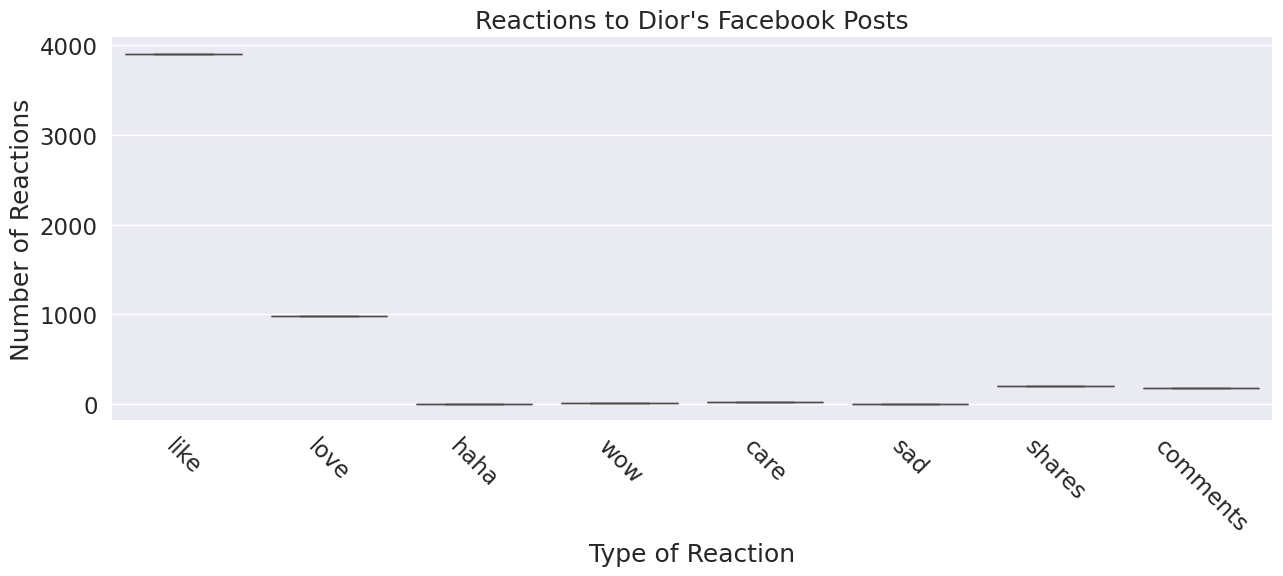

In [36]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.boxplot(x=list(reactions10.keys()), y=list(reactions10.values()))
ax.set_title("Reactions to Dior's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

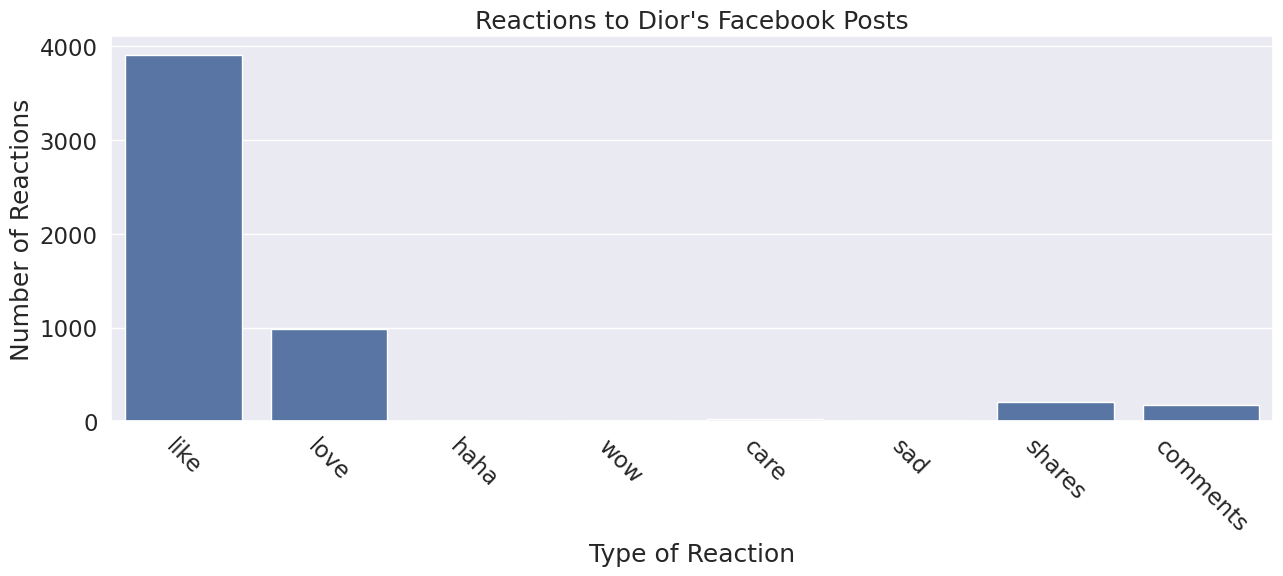

In [37]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions10.keys()), y=list(reactions10.values()))
ax.set_title("Reactions to Dior's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [27]:
df_text = half_raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,648774307435231,"L’Or de J’adore, a House masterpiece by Franci..."
2,648717870774208,The most wondrous of the season.\n\nFor Holida...
3,648716550774340,"This Holiday season, Dream in Dior at the hear..."
4,648686550777340,Join Anya Taylor Joy on this dream-like journe...
5,648681107444551,"For the Holidays, follow the Dior star and emb..."
...,...,...
76,6711013762286565,“The wow factor isn’t just the sublime makeup ...
77,6711005758954032,Uncover the new Rouge Dior Forever Liquid Lacq...
78,6711002522287689,We are proud to reveal Rouge Dior Forever Liqu...
79,6704384272949514,"Nestled on the mountainside, amidst the splend..."


In [30]:
df_text.tail(20)

,post_id,post_text
60,6728204517234156,"Echoing the warmth of the scent, the iconic ne..."
61,6728202737234334,Charlize Theron embodies the essence of L'Or d...
62,6728218197232788,“Scent is very powerful. It can tell the world...
63,6728453377209270,"""L'Or de J'adore, is all its flowers"" Francis ..."
64,6728449637209644,"""L'Or de J'adore, is all its flowers"" Francis ..."
65,6750591814995426,Discover the Dior men's Winter 2023-2024 colle...
66,6743748049013136,"Dior Global Ambassador Jisoo radiates in Dior,..."
67,6743752825679325,A colour palette for all.\n\nFrom soft beige t...
68,6743751295679478,"Celebrating the power of natural beauty, House..."
69,6684942904893651,"Celebrating every woman’s beauty, the new Roug..."


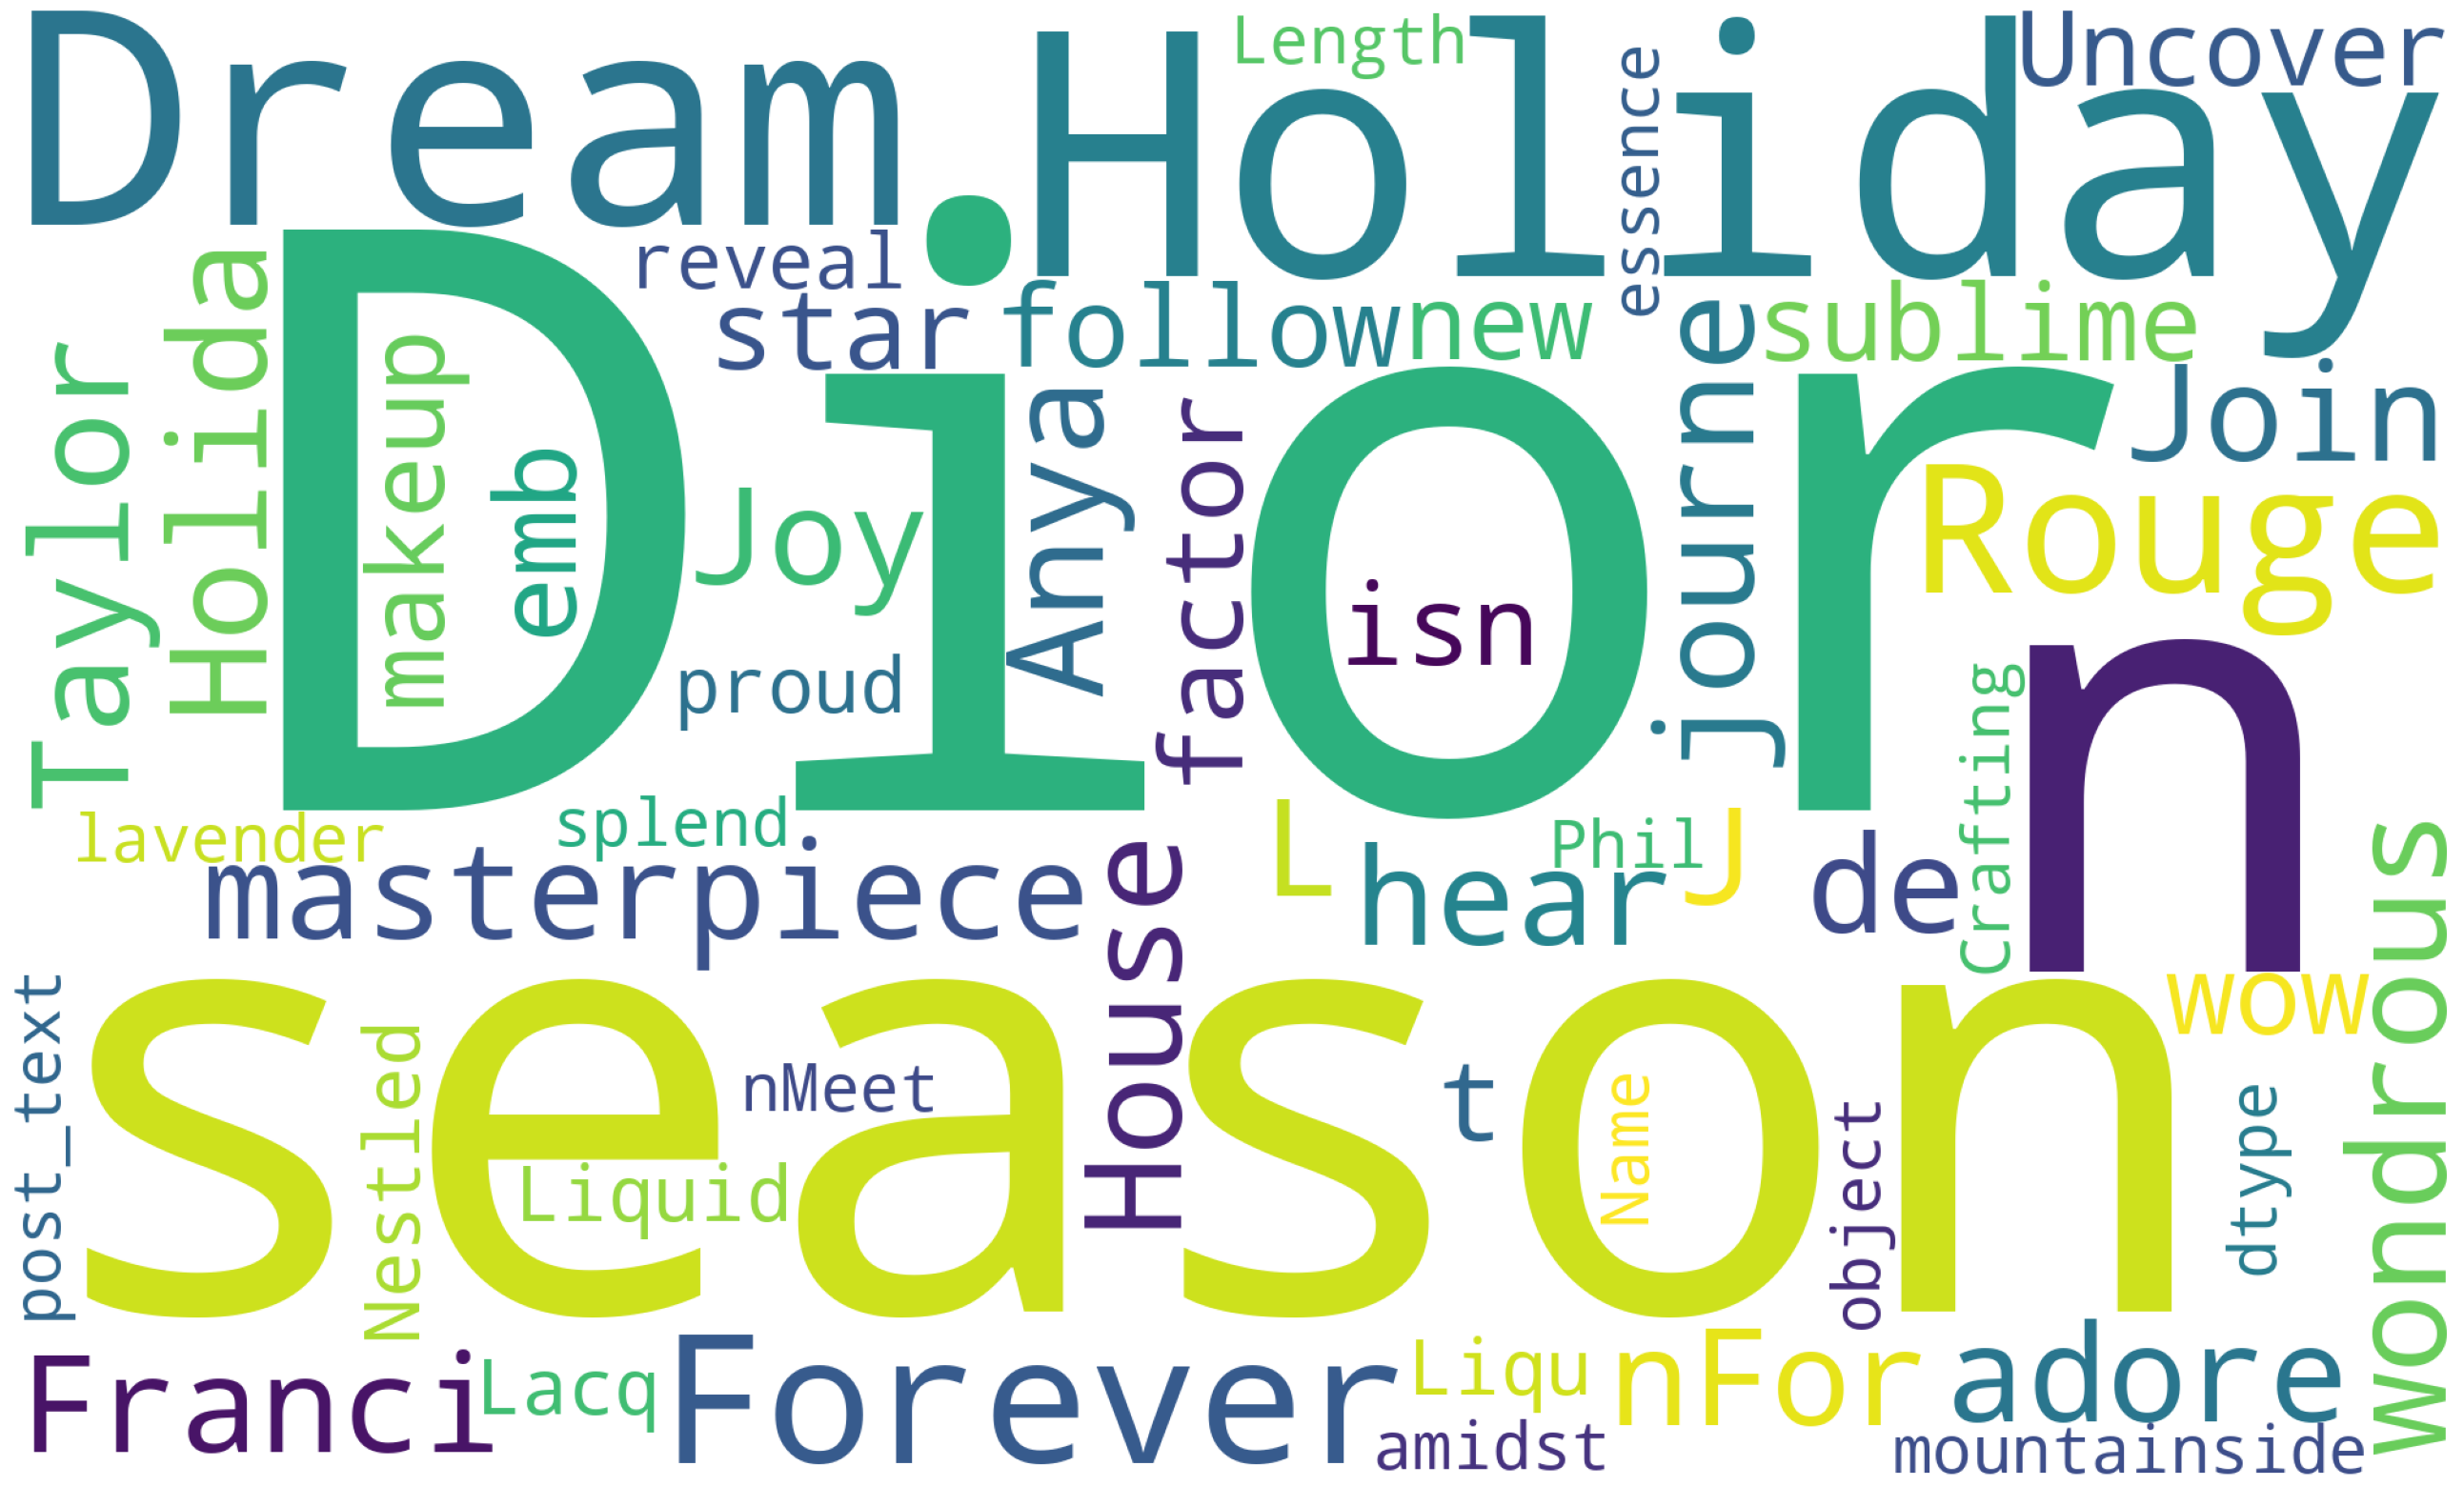

In [38]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()